#**Online Shoppers Intention Analysis**

#### **Objectives:**







* Analyze the Customer's Intentions based on the transactions, duration made online in a year.
* Create a model that can predict the purchasing intentions of customers.



---



####**Import libraries:**


In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style(style='white')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

# Ignore warning messages:
import warnings
warnings.filterwarnings('ignore')

####**Reading Data:**

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/AbeerAlghamdi1/SDAIA_Final_Project/main/Dataset/online_shoppers_intention.csv")

# Showing the first 5 rows of data:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


#### **Target Feature:**


---




The **'Revenue'** feature is the **Target** feature.

*    **False** means visitors did not complete the purchase.
*    **True** means visitors completed the purchase.

####**Features Information:**


In [4]:
# Showing the number of rows and columns in data:
df.shape

(12330, 18)

In [5]:
# Data information:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
# Description of data:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [7]:
# Showing missing data:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [8]:
# Calculate duplicate values:
df.duplicated().sum()

125

In [9]:
# Remove duplicate values:
df.drop_duplicates(inplace=True)

In [10]:
# Data shape after removing duplicate values:
df.shape

(12205, 18)

In [11]:
# Counts the unique values:
df['Revenue'].value_counts()

False    10297
True      1908
Name: Revenue, dtype: int64

## **Exploratory Data Analysis (EDA):**

In [12]:
# Function to set the distribution of features:

def features_countplot(df, col, return_pct_share=True, figsize=(12,6)):
    
    plt.figure(figsize=figsize)
    g = sns.countplot(data=df, x=col, palette = "Pastel1")
    for rect in g.patches:
        h = rect.get_height()
        w = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()
        g.annotate(f"{h}", (x+w/2, h), ha='center', va='bottom', fontsize=12)
    g.spines['top'].set_visible(False)
    g.spines['right'].set_visible(False)
    g.spines['left'].set_visible(False)
    plt.setp(g.patches, linewidth=.8, edgecolor='black')
    sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)

    plt.show()
    
    if return_pct_share:
        print("\n")
        print(df[col].value_counts(normalize=True)*100)

In [14]:
## Function to set the distribution of features related to revenue:

def countplot(df, col, return_pct_share=True, hue=None, figsize=(12,6)):
    
    plt.figure(figsize=figsize)
    g = sns.countplot(data=df, x=col, hue='Revenue',palette = "Pastel1")
    for rect in g.patches:
        h = rect.get_height()
        w = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()
        g.annotate(f"{h}", (x+w/2, h), ha='center', va='bottom', fontsize=12)
    g.spines['top'].set_visible(False)
    g.spines['right'].set_visible(False)
    g.spines['left'].set_visible(False)
    plt.setp(g.patches, linewidth=.8, edgecolor='black')
    sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
    
    plt.show()
    
    if return_pct_share:
        print("\n")
        print(df[col].value_counts(normalize=True)*100)

####**1.Revenue Distribution:**

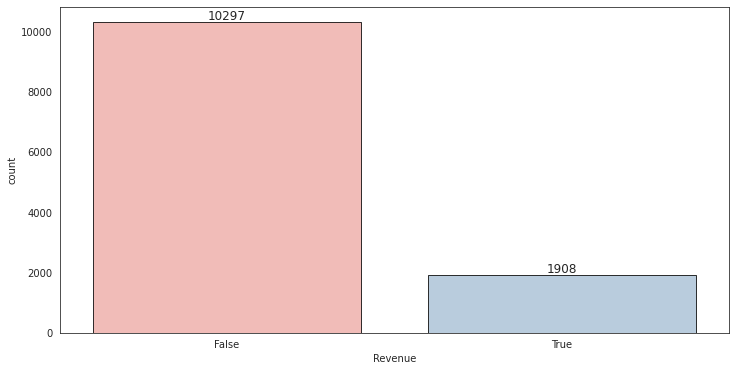



False    84.367063
True     15.632937
Name: Revenue, dtype: float64


In [13]:
#Revenue Distribution:
features_countplot(df, 'Revenue')


**Observations:**



*   **84.4%** of the transactions did not turn into sales.
*   **15.6 %** of transactions turned into sales.




####**2.Administrative Page Distribution:**

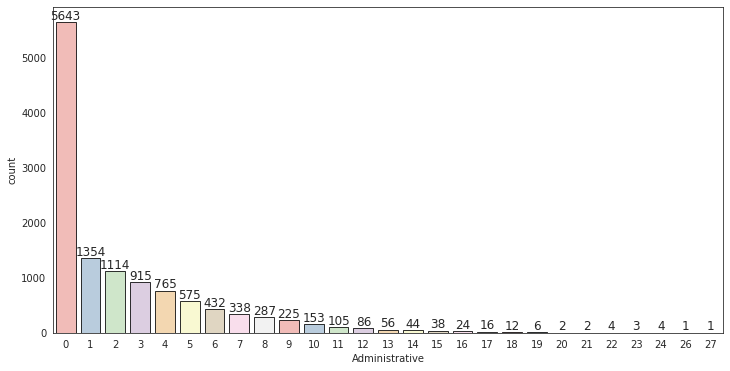



0     46.235150
1     11.093814
2      9.127407
3      7.496927
4      6.267923
5      4.711184
6      3.539533
7      2.769357
8      2.351495
9      1.843507
10     1.253585
11     0.860303
12     0.704629
13     0.458828
14     0.360508
15     0.311348
16     0.196641
17     0.131094
18     0.098320
19     0.049160
24     0.032773
22     0.032773
23     0.024580
20     0.016387
21     0.016387
26     0.008193
27     0.008193
Name: Administrative, dtype: float64


In [23]:
#Administrative Page Distribution:
features_countplot(df, 'Administrative')

**Observations:**

* Customers tend to visit **Administrative page 0** more than other Administrative pages.

####**3.Informational Page Distribution:**

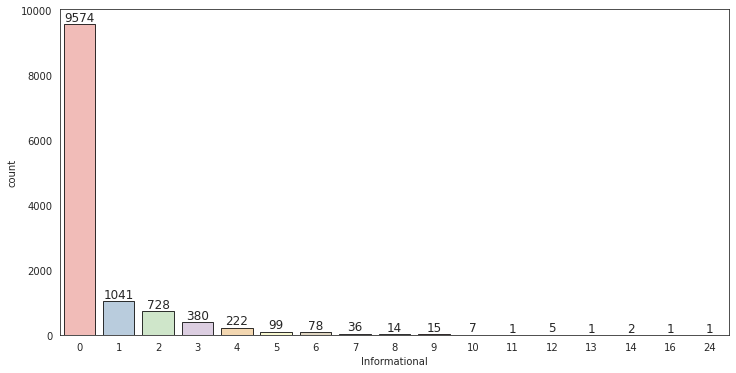



0     78.443261
1      8.529291
2      5.964769
3      3.113478
4      1.818927
5      0.811143
6      0.639082
7      0.294961
9      0.122900
8      0.114707
10     0.057354
12     0.040967
14     0.016387
11     0.008193
13     0.008193
24     0.008193
16     0.008193
Name: Informational, dtype: float64


In [24]:
#Informational Page Distribution:
features_countplot(df, 'Informational')

**Observations:**

* **Information page 0** has the highest number of visitors.


####**4.Special Day Distribution:**

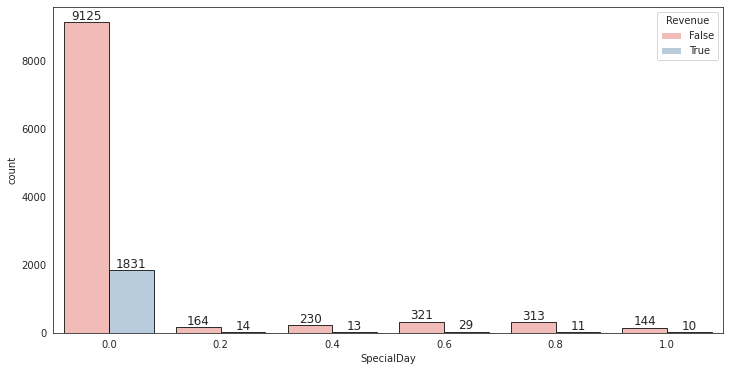



0.0    89.766489
0.6     2.867677
0.8     2.654650
0.4     1.990987
0.2     1.458419
1.0     1.261778
Name: SpecialDay, dtype: float64


In [18]:
#Special Day Distribution related to Revenue:
countplot(df, 'SpecialDay')

**Observations:**

* **Special day** probability values:

1. If it is greater than **0.4** it is **'1'** which indicates it is a **'Special day'**.
2. If it is less than or equal to **0.4** it is** 0** which indicates **'Not a Special day'**.



*  **So , we can say there is no effect of special days on customer purchase intention.**



####**5.Months Distribution:**

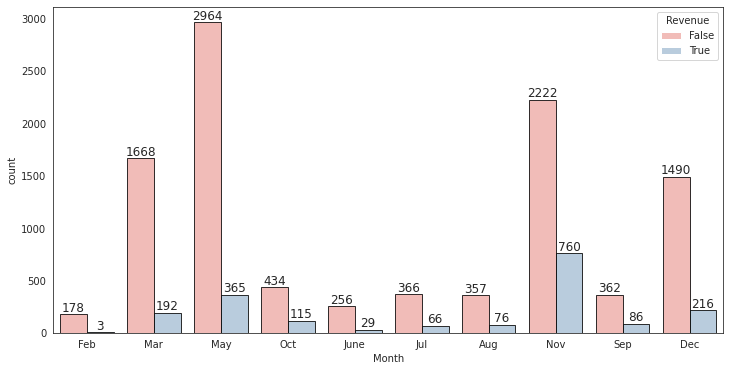



May     27.275707
Nov     24.432610
Mar     15.239656
Dec     13.977878
Oct      4.498156
Sep      3.670627
Aug      3.547726
Jul      3.539533
June     2.335109
Feb      1.482999
Name: Month, dtype: float64


In [19]:
# Months Distribution related to Revenue:
countplot(df, 'Month')

**Observations:**



*   Beyond than **80%** of transactions made on **Mar**, **May** , **Nov** and **Dec** months.




####**6.Operating Systems Distribution:**

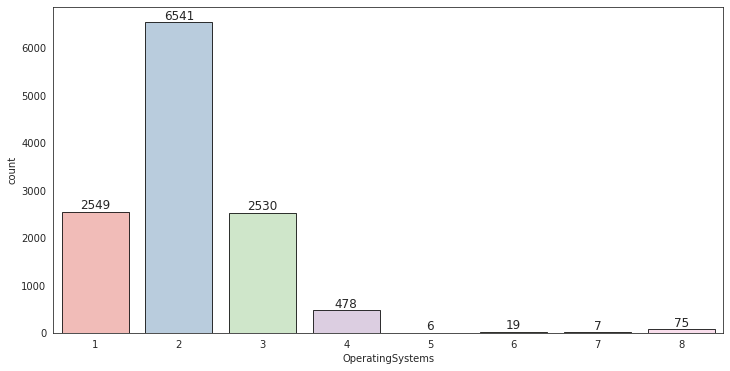



2    53.592790
1    20.884883
3    20.729209
4     3.916428
8     0.614502
6     0.155674
7     0.057354
5     0.049160
Name: OperatingSystems, dtype: float64


In [22]:
#Operating Systems Distribution:
features_countplot(df, 'OperatingSystems')

**Observations:**

* More than **50%** of visitors are using **operating system 2.**

####**7.Browser Distribution:** 

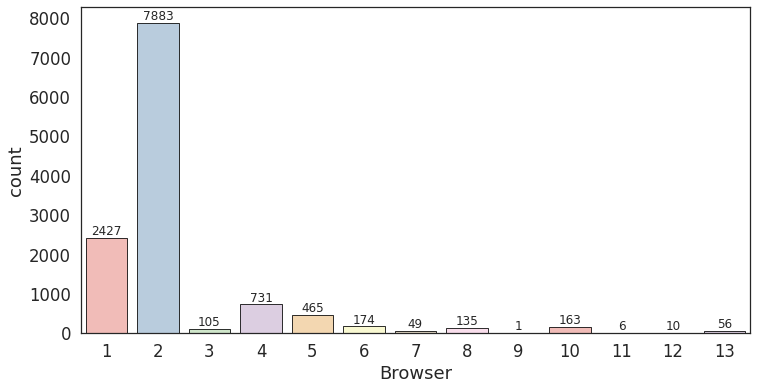



2     64.588283
1     19.885293
4      5.989349
5      3.809914
6      1.425645
10     1.335518
8      1.106104
3      0.860303
13     0.458828
7      0.401475
12     0.081934
11     0.049160
9      0.008193
Name: Browser, dtype: float64


In [114]:
#Browser Distribution:
features_countplot(df, 'Browser')

**Observations:**

* **64.5%** percent of visitors are coming from **browser 2** followed by **20%** from **browser 1.**

####**8.Region Distribution:** 

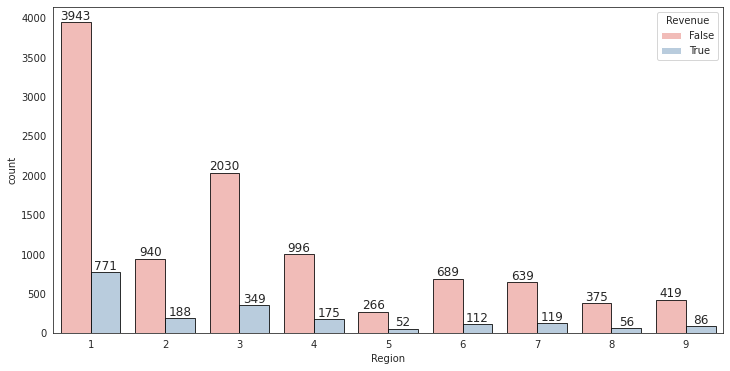



1    38.623515
3    19.492011
4     9.594429
2     9.242114
6     6.562884
7     6.210569
9     4.137649
8     3.531340
5     2.605490
Name: Region, dtype: float64


In [17]:
# Region Distribution related to Revenue:
countplot(df, 'Region')

**Observations:**

* Around **39%** of visitors come from **Region 1** followed by **19.5%** from **Region 3**.

####**9.Traffic Type Distribution:** 

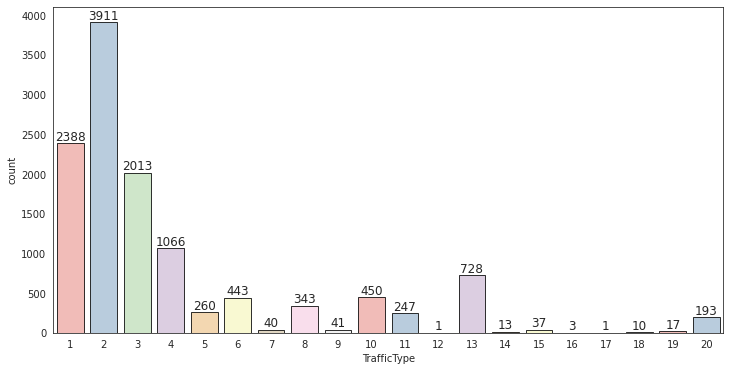



2     32.044244
1     19.565752
3     16.493240
4      8.734125
13     5.964769
10     3.687014
6      3.629660
8      2.810324
5      2.130274
11     2.023761
20     1.581319
9      0.335928
7      0.327735
15     0.303154
19     0.139287
14     0.106514
18     0.081934
16     0.024580
12     0.008193
17     0.008193
Name: TrafficType, dtype: float64


In [20]:
#Traffic Type Distribution:
features_countplot(df, 'TrafficType')

**Observations:**

* **32%** of our visitors are coming from** traffic type 2.**

####**10.Visitor Type Distribution:**

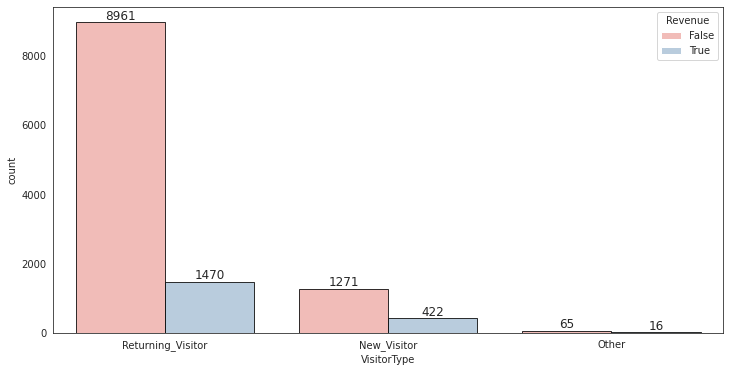



Returning_Visitor    85.464973
New_Visitor          13.871364
Other                 0.663662
Name: VisitorType, dtype: float64


In [15]:
# Visitor Type Distribution related to Revenue:
countplot(df,'VisitorType')

**Observations:**

* **85%** of customers are **Returning Visitors**, which is a good indicator that may mean our customers are satisfied with our products.
* **13.74%** of customers are **new customers**.


####**11.Weekend Distribution:**

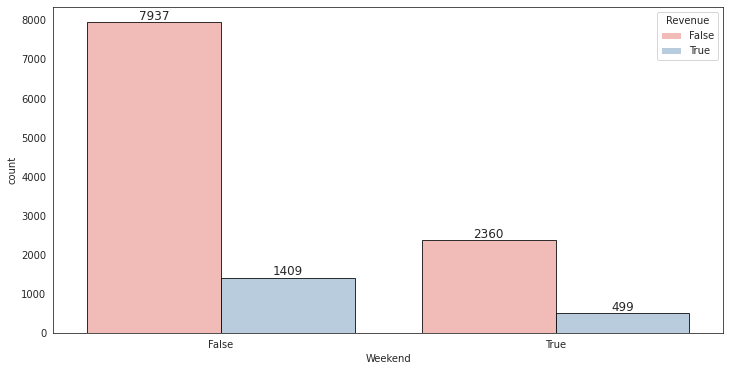



False    76.575174
True     23.424826
Name: Weekend, dtype: float64


In [16]:
# Weekend Distribution related to Revenue:
countplot(df, 'Weekend')

**Observations:**

* Around **77%** of visitors visit our site during weekdays rather  than weekends.

#### **12.Website Usage Percentage:**

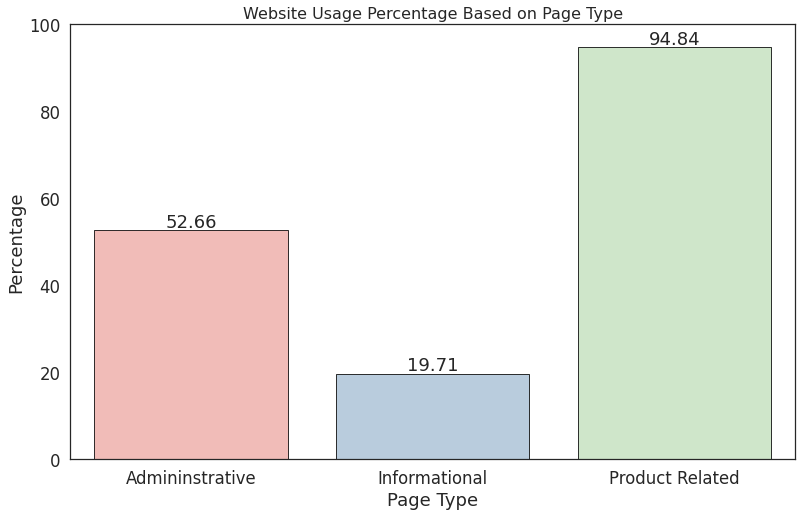

In [119]:
# Percentage based on the type of webpage:
df_admin = df[df.Administrative_Duration > 0]
df_info = df[df.Informational_Duration > 0]
df_Product_Duration = df[df.ProductRelated_Duration > 0]

df_website_percentage = {}
df_website_percentage = pd.DataFrame(df_website_percentage)

df_website_percentage.loc['Website Usage','Admininstrative'] = df_admin['Administrative_Duration'].count() / df['Administrative_Duration'].count() * 100
df_website_percentage.loc['Revenue Rate','Admininstrative'] = df_admin['Revenue'].sum() / df_admin['Administrative_Duration'].count() * 100

df_website_percentage.loc['Website Usage','Informational'] = df_info['Informational_Duration'].count() / df['Informational_Duration'].count() * 100
df_website_percentage.loc['Revenue Rate','Informational'] = df_info['Revenue'].sum() / df_info['Informational_Duration'].count() * 100

df_website_percentage.loc['Website Usage','Product Related'] = df_Product_Duration['ProductRelated_Duration'].count() / df['ProductRelated_Duration'].count() * 100
df_website_percentage.loc['Revenue Rate','Product Related'] = df_Product_Duration['Revenue'].sum() / df_Product_Duration['ProductRelated_Duration'].count() * 100

# Website Percentages Plot based on usage:
fig, ax1 = plt.subplots(figsize = (13,8))
sns.barplot(x = df_website_percentage.columns, y = df_website_percentage.loc['Website Usage',:], ax = ax1 ,palette = "Pastel1")
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2.,
                                                p.get_height()), ha = 'center', va = 'center', xytext = (0, 8) , textcoords = 'offset points')
plt.setp(ax1.patches, linewidth=.8, edgecolor='black')
ax1.set_title("Website Usage Percentage Based on Page Type", fontsize = 16)
ax1.set_ylim(0,100)
ax1.set(xlabel = 'Page Type', ylabel = 'Percentage')
plt.show()

**Observations:**



*  Around **50%** of the users visit the **Administrative page** and most of them visit the **Product pages** as well.



####**13.Continuous Features Distribution:**

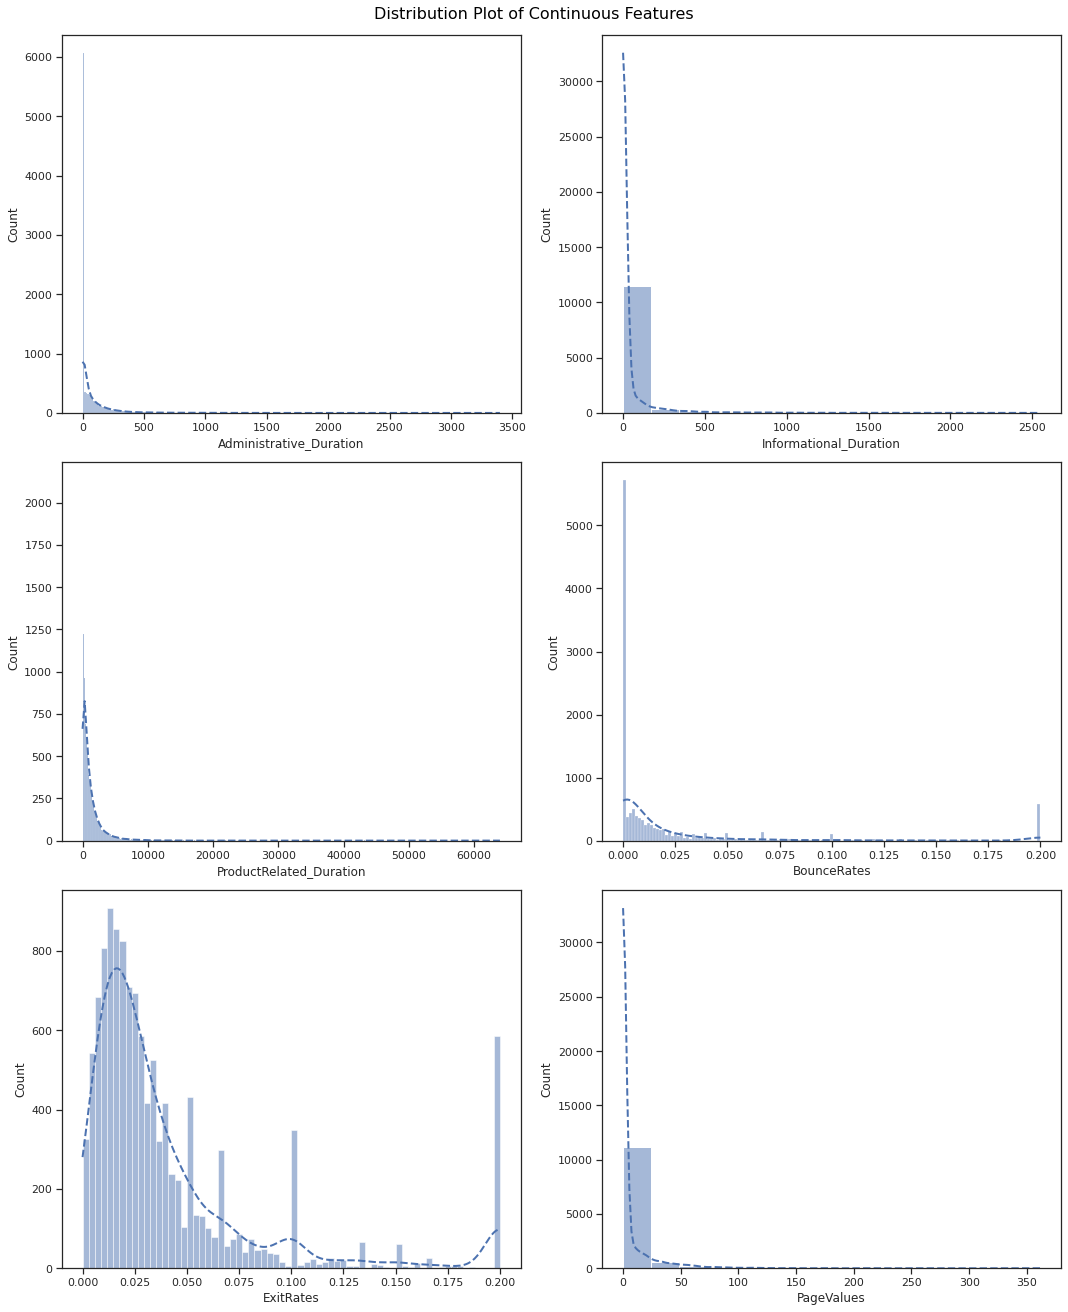

In [27]:
# Distribution Plots of continuous_features:
continuous_features = ['Administrative_Duration', 
                       'Informational_Duration', 
                       'ProductRelated_Duration', 
                       'BounceRates', 
                       'ExitRates', 
                       'PageValues']

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15,18))
axs = np.ravel(axs)
for i, col in enumerate(continuous_features):
    plt.sca(axs[i])
    sns.histplot(data=df, x=col, kde=True, line_kws={'lw':2, 'ls':'--'}, palette= "Pastel1")

plt.suptitle("Distribution Plot of Continuous Features", fontsize=16, color='#000000', va='bottom', y=1)
plt.tight_layout()
plt.show()

#### **14.Heatmap Correlation Matrix:**

In [116]:
# Displaying correlation matrix using heatmap:
plt.figure(figsize=(12,8))
corr = df.corr()
corr.style.background_gradient(cmap='Purples')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Revenue,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
Administrative,1.000000,0.600457,0.375256,0.254813,0.428305,0.371146,-0.213096,-0.311255,0.097017,-0.096951,-0.006586,-0.025622,-0.007262,-0.034643,0.136330,0.045920,-0.013986,-0.065812,0.004874,-0.001887,-0.051361,-0.064969,0.049955,0.089970,0.058377,0.025858,-0.019528,-0.020859,-0.023825,0.023825
Administrative_Duration,0.600457,1.000000,0.301419,0.237211,0.286863,0.353583,-0.136913,-0.201971,0.066228,-0.074666,-0.007529,-0.015742,-0.006729,-0.014991,0.091768,0.027091,-0.004646,-0.044584,-0.002992,-0.019074,-0.020582,-0.039489,0.031316,0.054161,0.030443,0.023333,-0.007302,-0.021201,-0.013259,0.013259
Informational,0.375256,0.301419,1.000000,0.618648,0.372572,0.386052,-0.109095,-0.159429,0.047406,-0.049350,-0.009721,-0.038787,-0.030317,-0.035197,0.093626,0.005112,0.003170,-0.040430,0.001123,0.007236,-0.025777,-0.038586,0.062932,-0.003499,0.008912,-0.055058,-0.020732,0.058771,-0.034359,0.034359
Informational_Duration,0.254813,0.237211,0.618648,1.000000,0.279082,0.346596,-0.069878,-0.102852,0.030090,-0.031261,-0.009734,-0.019573,-0.027891,-0.025126,0.069358,0.000934,0.010582,-0.028109,0.014487,-0.015482,-0.010124,-0.031945,0.036362,0.005895,0.001258,-0.044203,-0.013041,0.046354,-0.023193,0.023193
ProductRelated,0.428305,0.286863,0.372572,0.279082,1.000000,0.860330,-0.192884,-0.286082,0.054201,-0.025839,0.004194,-0.013586,-0.040108,-0.044223,0.156042,0.026722,-0.033615,-0.056933,0.018737,0.015221,-0.111863,-0.072658,0.181510,0.007402,0.004637,-0.125823,-0.034843,0.131420,-0.013477,0.013477
ProductRelated_Duration,0.371146,0.353583,0.386052,0.346596,0.860330,1.000000,-0.173829,-0.245265,0.050923,-0.038122,0.002870,-0.007724,-0.034869,-0.037390,0.150077,0.006561,-0.017184,-0.046542,0.001060,0.001544,-0.082655,-0.068521,0.166139,-0.010176,0.004719,-0.119215,-0.025907,0.122881,-0.004903,0.004903
BounceRates,-0.213096,-0.136913,-0.109095,-0.069878,-0.192884,-0.173829,1.000000,0.902144,-0.115799,0.088626,0.026811,-0.015501,0.002787,0.089184,-0.145091,-0.009152,-0.021691,0.065382,0.018228,0.044405,-0.029490,0.063281,-0.026152,-0.040864,-0.035316,-0.135010,0.018438,0.128156,0.034808,-0.034808
ExitRates,-0.311255,-0.201971,-0.159429,-0.102852,-0.286082,-0.245265,0.902144,1.000000,-0.173627,0.117176,0.016345,-0.003323,-0.000987,0.087478,-0.204320,-0.015534,-0.018481,0.081324,0.016038,0.051199,-0.007283,0.076880,-0.050893,-0.058554,-0.047130,-0.181623,0.026799,0.171942,0.053061,-0.053061
PageValues,0.097017,0.066228,0.047406,0.030090,0.054201,0.050923,-0.115799,-0.173627,1.000000,-0.064481,0.018632,0.045908,0.010588,0.012286,0.491894,-0.000118,0.020914,-0.033180,-0.018949,-0.020910,-0.042960,-0.015132,0.037131,0.031368,0.016820,0.103895,0.057582,-0.115154,-0.010801,0.010801
SpecialDay,-0.096951,-0.074666,-0.049350,-0.031261,-0.025839,-0.038122,0.088626,0.117176,-0.064481,1.000000,0.012806,0.003528,-0.016450,0.052856,-0.083601,-0.059500,-0.125058,0.107924,-0.059429,-0.047971,-0.131549,0.466961,-0.176407,-0.067330,-0.060560,-0.083900,-0.025358,0.088122,0.017723,-0.017723


<Figure size 864x576 with 0 Axes>

**Observations:**






*   There is a high correlation with **Page values** and **Revenue.**
*  **Bounces rates** have a negative influence on **Revenue.**
*   Pages which have high **Bounce rates** tend to have high **Exit rates.**
*   The website earns a lot of **Revenue** from **product related.pages.**




## **Data Preparation:**



#### **1.Label encoding of Revenue:**





In [29]:
# Convert Revenue values to 0 and 1 - binary
from sklearn import preprocessing
label_encoding = preprocessing.LabelEncoder()
df.Revenue= label_encoding.fit_transform(df.Revenue.astype(str))

In [30]:
label_encoding.classes_ # 0 -> ('False') , 1 -> ('True')

array(['False', 'True'], dtype=object)

####**2.Convert Categorical Data:**

In [31]:
# Convert categorical variable to dummy variables:
df= pd.get_dummies(df, columns=['Month','VisitorType','Weekend'])

In [32]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Revenue,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1


####**3.Train Test Split:**

In [33]:
# select split parameter
x = df.drop(['Revenue'], axis=1)
y = df.Revenue

# splitting into train and test sets for both parameters
x_train, x_test ,y_train , y_test = train_test_split(x,y, train_size=0.8, random_state= 42)


 #### **4.Scaling Data:**

In [34]:
# Converting data to same scale
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## **Modeling:**


#### **1.Logistic Regression:**

In [35]:
# Building the model:
lr = LogisticRegression()

# Fit the model on training data:
lr.fit(x_train, y_train)

# Predict the testing data:
lr_preds = lr.predict(x_test)

##### **LR - Accuracy:**

In [36]:
# Showing the Accuracy:
acc_lr = accuracy_score(y_test , lr_preds)
acc_lr

0.8906185989348627

##### **LR - Classification Report:**

In [37]:
# Displaying classification report:
print(classification_report(y_test, lr_preds))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      2079
           1       0.76      0.38      0.51       362

    accuracy                           0.89      2441
   macro avg       0.83      0.68      0.72      2441
weighted avg       0.88      0.89      0.87      2441



##### **LR - Confusion Matrix:**

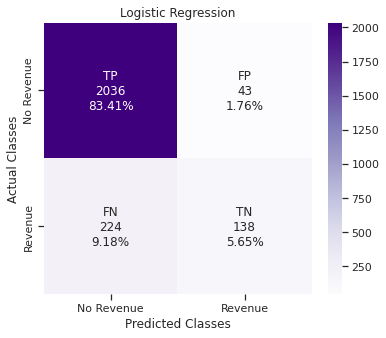

In [38]:
# Assigning values of confusion matrix:
cf = confusion_matrix(y_test, lr_preds)
group_names = ['TP','FP','FN','TN']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf.flatten()/np.sum(cf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ticks_labels = ['No Revenue', 'Revenue']

# Plot confusion matrix using heatmap:
plt.figure(figsize=(6,5))
sns.heatmap(cf, annot=labels, fmt='' , cmap="Purples", yticklabels=ticks_labels , xticklabels= ticks_labels);
plt.title("Logistic Regression")
plt.ylabel('Actual Classes')
plt.xlabel('Predicted Classes')
sns.set(font_scale=1.5);

#### **2.KNeighbors Classifier:**

In [39]:
# Building the model:
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model on training data:
knn = knn.fit(x_train, y_train)

# Predict the testing data:
knn_preds = knn.predict(x_test)


##### **KNN - Accuracy:**

In [40]:
# Showing the Accuracy:
acc_knn = accuracy_score(y_test, knn_preds)
acc_knn

0.8648095043015158

##### **KNN - Classification Report:**

In [41]:
# Displaying classification report:
print(classification_report(y_test, knn_preds))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      2079
           1       0.57      0.36      0.44       362

    accuracy                           0.86      2441
   macro avg       0.73      0.65      0.68      2441
weighted avg       0.85      0.86      0.85      2441



##### **KNN - Confusion Matrix:**

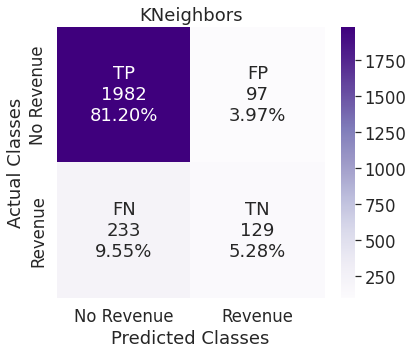

In [42]:
# Assigning values of confusion matrix:
cf = confusion_matrix(y_test, knn_preds)
group_names = ['TP','FP','FN','TN']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf.flatten()/np.sum(cf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ticks_labels =  ['No Revenue', 'Revenue']

# Plot confusion matrix using heatmap:
plt.figure(figsize=(6,5))
sns.heatmap(cf, annot=labels, fmt='' , cmap="Purples", yticklabels=ticks_labels , xticklabels= ticks_labels);
plt.title("KNeighbors")
plt.ylabel('Actual Classes')
plt.xlabel('Predicted Classes')
sns.set(font_scale=1.5);

#### **3.Decision Tree Classifier:** 

In [43]:
# Building the model:
dt = DecisionTreeClassifier()

# Fit the model on training data:
dt = dt.fit(x_train, y_train)

# Predict the testing data:
dt_preds= dt.predict(x_test)

##### **DT - Accuracy:**

In [44]:
# Showing the Accuracy:
acc_dt = accuracy_score(y_test , dt_preds)
acc_dt

0.8656288406390823

##### **DT - Confusion Matrix:**

In [45]:
# Displaying classification report:
print(classification_report(y_test, dt_preds))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      2079
           1       0.55      0.52      0.54       362

    accuracy                           0.87      2441
   macro avg       0.73      0.72      0.73      2441
weighted avg       0.86      0.87      0.86      2441



##### **DT - Confusion Matrix:**

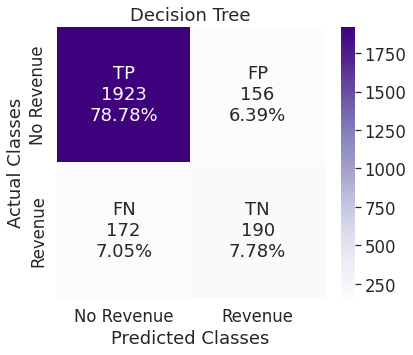

In [46]:
# Assigning values of confusion matrix:
cf = confusion_matrix(y_test, dt_preds)
group_names = ['TP','FP','FN','TN']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf.flatten()/np.sum(cf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ticks_labels = ['No Revenue', 'Revenue']

# Plot confusion matrix using heatmap:
plt.figure(figsize=(6,5))
sns.heatmap(cf, annot=labels, fmt='', cmap="Purples" , yticklabels=ticks_labels , xticklabels= ticks_labels);
plt.title("Decision Tree")
plt.ylabel('Actual Classes')
plt.xlabel('Predicted Classes')
sns.set(font_scale=1.5);

#### **4.Gradient Boosting Classifier:** 

In [47]:
# Building the model:
gb = GradientBoostingClassifier()

# Fit the model on training data:
gb = gb.fit(x_train, y_train)

# Predict the testing data:
gb_preds= gb.predict(x_test)

##### **GB - Accuracy:**

In [48]:
# Showing the Accuracy:
acc_gb = accuracy_score(y_test , gb_preds)
acc_gb

0.9045473166734944

##### **GB - Confusion Matrix:**

In [49]:
# Displaying classification report:
print(classification_report(y_test, gb_preds))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      2079
           1       0.72      0.58      0.64       362

    accuracy                           0.90      2441
   macro avg       0.83      0.77      0.79      2441
weighted avg       0.90      0.90      0.90      2441



##### **GB - Confusion Matrix:**

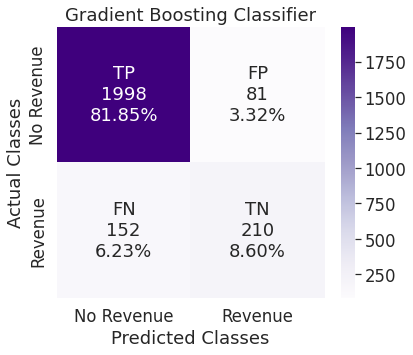

In [50]:
# Assigning values of confusion matrix:
cf = confusion_matrix(y_test, gb_preds)
group_names = ['TP','FP','FN','TN']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf.flatten()/np.sum(cf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ticks_labels = ['No Revenue', 'Revenue']

# Plot confusion matrix using heatmap:
plt.figure(figsize=(6,5))
sns.heatmap(cf, annot=labels, fmt='', cmap="Purples" , yticklabels=ticks_labels , xticklabels= ticks_labels);
plt.title("Gradient Boosting Classifier")
plt.ylabel('Actual Classes')
plt.xlabel('Predicted Classes')
sns.set(font_scale=1.5);

#### **5.Naive Bayes Classifier:** 

In [51]:
# Building the model:
nb = BernoulliNB()

# Fit the model on training data:
nb = nb.fit(x_train, y_train)

# Predict the testing data:
nb_preds= nb.predict(x_test)

##### **NB - Accuracy:**

In [52]:
# Showing the Accuracy:
acc_nb = accuracy_score(y_test , nb_preds)
acc_nb

0.8594838181073331

##### **NB - Confusion Matrix:**

In [53]:
# Displaying classification report:
print(classification_report(y_test, nb_preds))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      2079
           1       0.52      0.59      0.56       362

    accuracy                           0.86      2441
   macro avg       0.73      0.75      0.74      2441
weighted avg       0.87      0.86      0.86      2441



##### **NB - Confusion Matrix:**

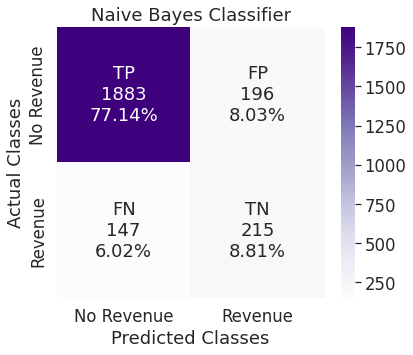

In [54]:
# Assigning values of confusion matrix:
cf = confusion_matrix(y_test, nb_preds)
group_names = ['TP','FP','FN','TN']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf.flatten()/np.sum(cf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ticks_labels = ['No Revenue', 'Revenue']

# Plot confusion matrix using heatmap:
plt.figure(figsize=(6,5))
sns.heatmap(cf, annot=labels, fmt='', cmap="Purples" , yticklabels=ticks_labels , xticklabels= ticks_labels);
plt.title("Naive Bayes Classifier")
plt.ylabel('Actual Classes')
plt.xlabel('Predicted Classes')
sns.set(font_scale=1.5);

#### **6.Random Forest Classifier:**

In [55]:
# Building the model:
rf = RandomForestClassifier(random_state=25)

# Fit the model on training data:
rf = rf.fit(x_train, y_train)

# Predict the testing data:
rf_preds= rf.predict(x_test)


##### **RF - Accuracy:**

In [56]:
# Showing the Accuracy:
acc_rf = accuracy_score(y_test , rf_preds)
acc_rf

0.9082343301925441

##### **RF - Classification Report:**

In [57]:
# Displaying classification report:
print(classification_report(y_test, rf_preds))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      2079
           1       0.77      0.54      0.64       362

    accuracy                           0.91      2441
   macro avg       0.85      0.76      0.79      2441
weighted avg       0.90      0.91      0.90      2441



##### **RF - Confusion Matrix:**

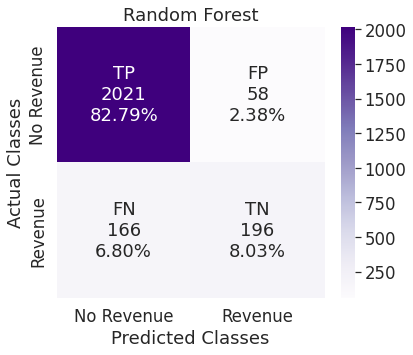

In [58]:
# Assigning values of confusion matrix:
cf = confusion_matrix(y_test, rf_preds)
group_names = ['TP','FP','FN','TN']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf.flatten()/np.sum(cf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ticks_labels = ['No Revenue', 'Revenue']

# Plot confusion matrix using heatmap:
plt.figure(figsize=(6,5))
sns.heatmap(cf, annot=labels, fmt='', cmap="Purples" , yticklabels=ticks_labels , xticklabels= ticks_labels);
plt.title("Random Forest")
plt.ylabel('Actual Classes')
plt.xlabel('Predicted Classes')
sns.set(font_scale=1.5);


####**Result:**
---

Random Forest Classifier has the highest accuracy score for analysing online shoppers intention data , So we will improve the Random Forest Classifier to get the best accuracy score using GridSearchCV and RandomizedSearchCV hyperparameters.

## **Optimize and Tune the hyperparameter:**

In [59]:
# Random Forest Model back to standard:
rf1 = RandomForestClassifier(random_state=25)

In [60]:
# Create the Random Forest param grid
param_grid = { 
  'bootstrap': [True, False],
  'max_depth': [ 100, 200, 500],
  'max_features': ['auto', 'sqrt'],
  'n_estimators': [100, 200, 300]
}


### **1.Random Forest - GridSearchCV:**

In [61]:
# Import GridSearchCV:
from sklearn.model_selection import GridSearchCV

# Building the model:
grid = GridSearchCV(estimator = rf1, param_grid = param_grid, cv = 10, verbose=2, n_jobs = 10)

In [62]:
# Fit the GridSearchCV:
grid_result = grid.fit(x_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


In [69]:
# Showing the best parameters:
grid_result.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 'auto',
 'n_estimators': 300}

In [71]:
# Appling the best parameters to Random Forest model:
rf_grid = RandomForestClassifier(bootstrap = True, max_depth = 100, max_features = "auto",
                                n_estimators = 300 , random_state=25 )

# Fit the model on training data:
rf_grid = rf_grid.fit(x_train, y_train)

# Predict the testing data:
rf_grid_preds= rf_grid.predict(x_test)


##### **RF_Grid - Accuracy:**

In [72]:
# Showing the Accuracy:
acc_rf_grid = accuracy_score(y_test , rf_grid_preds)
acc_rf_grid

0.9074149938549775

##### **RF_Grid - Classification Report:**

In [73]:
# Displaying classification_report:
print(classification_report(y_test, rf_grid_preds))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      2079
           1       0.77      0.54      0.63       362

    accuracy                           0.91      2441
   macro avg       0.84      0.76      0.79      2441
weighted avg       0.90      0.91      0.90      2441



##### **RF_Grid - Confusion Matrix:**

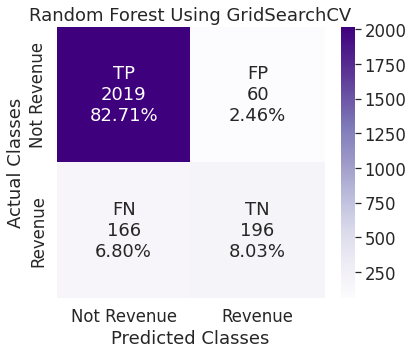

In [74]:
# Assigning values of confusion matrix:
cf = confusion_matrix(y_test, rf_grid_preds)
group_names = ['TP','FP','FN','TN']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf.flatten()/np.sum(cf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ticks_labels = ['Not Revenue', 'Revenue']

# Plot confusion matrix using heatmap:
plt.figure(figsize=(6,5))
sns.heatmap(cf, annot=labels, fmt='', cmap="Purples" , yticklabels=ticks_labels , xticklabels= ticks_labels);
plt.title("Random Forest Using GridSearchCV")
plt.ylabel('Actual Classes')
plt.xlabel('Predicted Classes')
sns.set(font_scale=1.5);

### **2.Random Forest - RandomizedSearchCV:**

In [75]:
# Import RandomizedSearchCV:
from sklearn.model_selection import RandomizedSearchCV

# Building the model:
Randomize = RandomizedSearchCV(estimator = rf1, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = 4)

In [76]:
# Fit the GridSearchCV:
Rendom = Randomize.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [77]:
# Showing the best parameters:
Rendom.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 'auto',
 'n_estimators': 300}

In [84]:
# Displaying the predictions
rf_Randomize = RandomForestClassifier(bootstrap = True, max_depth = 100, max_features = 'auto', n_estimators = 300,random_state=25)

# Fit the model on training data:
rf_Randomize = rf_Randomize.fit(x_train, y_train)

# Predict the testing data:
rf_rand_preds= rf_Randomize.predict(x_test)


##### **RF_Randomize - Accuracy**


In [86]:
# Showing the Accuracy:
acc_rf_rand = accuracy_score(y_test , rf_rand_preds)
acc_rf_rand

0.9074149938549775

##### **RF_Randomize - Classification Report:**

In [87]:
# Displaying classification_report:
print(classification_report(y_test, rf_rand_preds))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      2079
           1       0.77      0.54      0.63       362

    accuracy                           0.91      2441
   macro avg       0.84      0.76      0.79      2441
weighted avg       0.90      0.91      0.90      2441



##### **RF_Randomize - Confusion Matrix:**

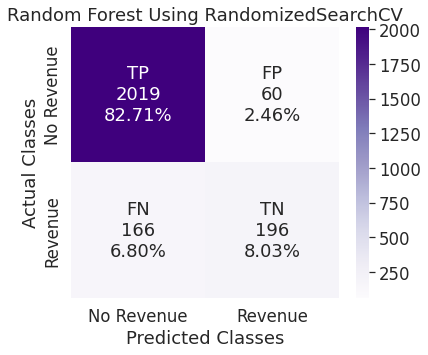

In [88]:
# Assigning values of confusion matrix:
cf = confusion_matrix(y_test, rf_rand_preds)
group_names = ['TP','FP','FN','TN']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf.flatten()/np.sum(cf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ticks_labels = ['No Revenue', 'Revenue']

# Plot confusion matrix using heatmap:
plt.figure(figsize=(6,5))
sns.heatmap(cf, annot=labels, fmt='', cmap="Purples" , yticklabels=ticks_labels , xticklabels= ticks_labels);
plt.title("Random Forest Using RandomizedSearchCV")
plt.ylabel('Actual Classes')
plt.xlabel('Predicted Classes')
sns.set(font_scale=1.5);

## **Models Comparison:**

### **Accuracy Scores Plot:**

In [89]:
# Save each Accuracy with its model name in a data frame
accuracies = pd.DataFrame()
accuracies['Model'] = ['Logistic' , 'KNN' , 'Decision Tree', 'Gradient Boosting', 'Naive Bayes' ,'Random Forest','RF_Grid','RF_Randomize']
accuracies['values'] = [ acc_lr , acc_knn , acc_dt , acc_gb , acc_nb ,  acc_rf , acc_rf_grid , acc_rf_rand]

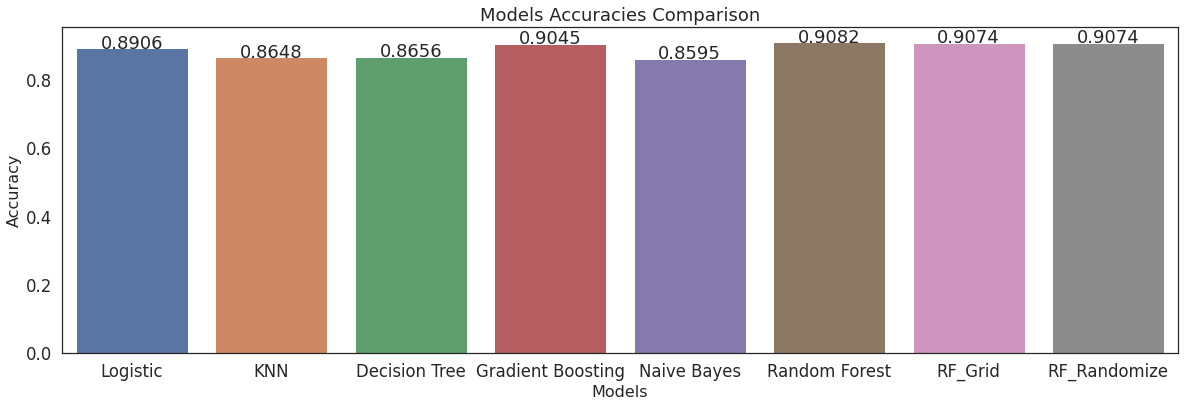

In [96]:
plt.figure(figsize=(20, 6))
splot=sns.barplot(x="Model",y="values",data=accuracies)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.4f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.xlabel("Models", size=16)
plt.ylabel("Accuracy", size=16)
plt.title('Models Accuracies Comparison');


### **Conclusion:**
*   **Random Forest Classifier** with and without hyperparameter optimization has the best accuracy score.


